In [2]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
cpus = tf.config.experimental.list_physical_devices('CPU')
tf.config.threading.set_intra_op_parallelism_threads(2)
tf.config.threading.set_inter_op_parallelism_threads(2)
#with tf.device('/CPU:0'):

# remove dodgy images

In [4]:
import cv2
import imghdr

C:\Users\hp\AppData\Local\Temp\ipykernel_11232\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data'
img_exts = ['jpeg']

In [6]:
os.listdir(data_dir)

['angry', 'happy']

In [20]:
os.path.join(data_dir, image_class, image)

'data\\happy\\_happy_jumping_on_beach-40815.jpeg'

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}' .format(image_path))

Issue with image data\angry\0144307B097D44218A1EF36BB9B0E5E8-1024x575.jpeg
Issue with image data\angry\116999ecb25ac04c42cdac0a91c578439f-29-angry-face.rsocial.w1200.jpeg
Issue with image data\angry\1409997457433_wps_12_Gerard_Butler_TELEVISION_.jpeg
Issue with image data\angry\17377054-close-up-image-of-man-gesturing-an-angry-face-against-white-background.jpeg
Issue with image data\angry\279095228827d80d9e1c88c79e21ea05.jpeg
Issue with image data\angry\360_anger.jpeg
Issue with image data\angry\360_F_218731746_Ma4YW19goP0k7rQ8Pgi7HFu74AQZt0L5.jpeg
Issue with image data\angry\360_F_36652065_Z2UpmxgbB8GtYW3PpxerHJQKoPNR0agP.jpeg
Issue with image data\angry\360_F_88818647_lwNDd65Sud1O5Pnaspu9D5Y0PfwgUaD6.jpeg
Issue with image data\angry\39843011-angry-face-man.jpeg
Issue with image data\angry\a19190a7dfcd00d59d65af8172386722f2e9ddc1.jpeg
Issue with image data\angry\angry face.jpeg
Issue with image data\angry\angry-eyebrows-1200x900.jpeg
Issue with image data\angry\angry-face.jpeg
Issue w

# Load Data

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 114 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
#Images represented as nympy arrays
batch = data_iterator.next()

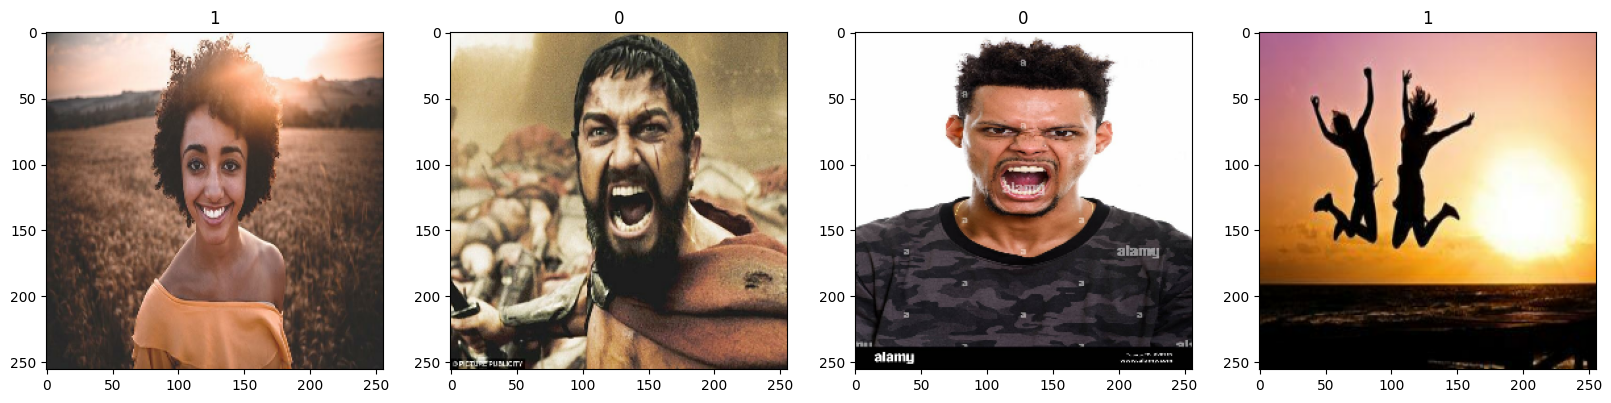

In [11]:
#class 1 = happy people, class 0= angry people
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing data

In [12]:
#scale data
data = data.map(lambda x, y: (x/255, y))

In [13]:
scaled_iterator = data.as_numpy_iterator()

In [14]:
batch = scaled_iterator.next()
batch[0].max()

1.0

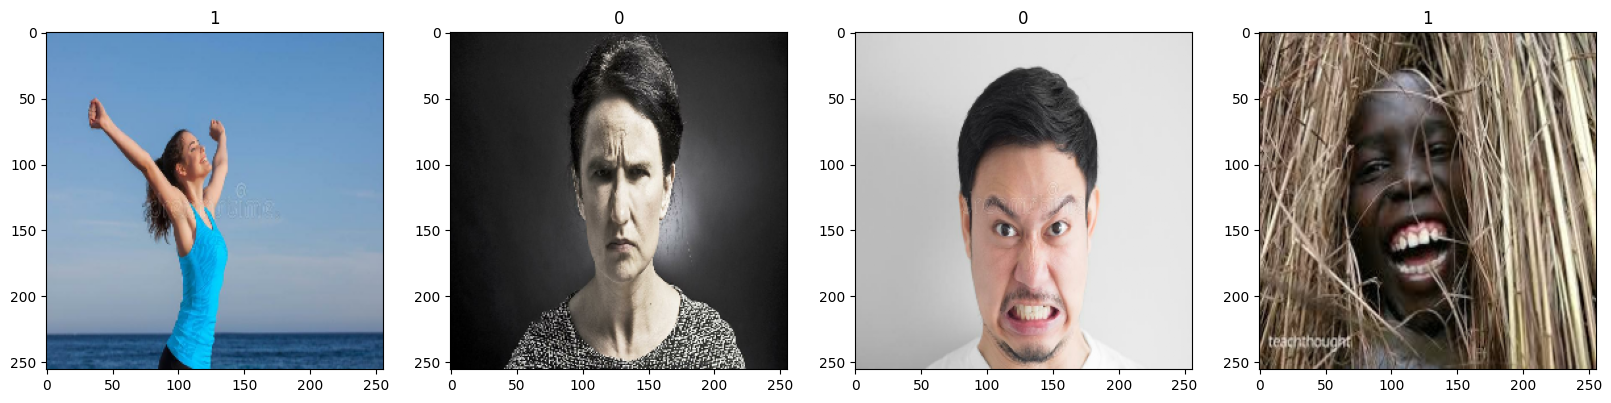

In [15]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Split data

In [99]:
len(data)

4

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation ='relu', input_shape=(256,256,3))), 
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train Model

In [24]:
logdir= 'logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 5s 2s/step - loss: 2.5537 - accuracy: 0.3750 - val_loss: 2.0662 - val_accuracy: 0.5625
Epoch 2/20
2/2 [==============================] - 3s 2s/step - loss: 1.0202 - accuracy: 0.6562 - val_loss: 0.6837 - val_accuracy: 0.5312
Epoch 3/20
2/2 [==============================] - 3s 2s/step - loss: 0.6724 - accuracy: 0.5312 - val_loss: 0.6738 - val_accuracy: 0.6250
Epoch 4/20
2/2 [==============================] - 3s 2s/step - loss: 0.6459 - accuracy: 0.6250 - val_loss: 0.6758 - val_accuracy: 0.6250
Epoch 5/20
2/2 [==============================] - 3s 2s/step - loss: 0.7581 - accuracy: 0.5938 - val_loss: 0.5323 - val_accuracy: 0.6875
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: 0.5958 - accuracy: 0.6094 - val_loss: 0.6280 - val_accuracy: 0.6562
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.6203 - accuracy: 0.6562 - val_loss: 0.6271 - val_accuracy: 0.4688
Epoch 8/20
2/2 [=========================

# Plotting performance

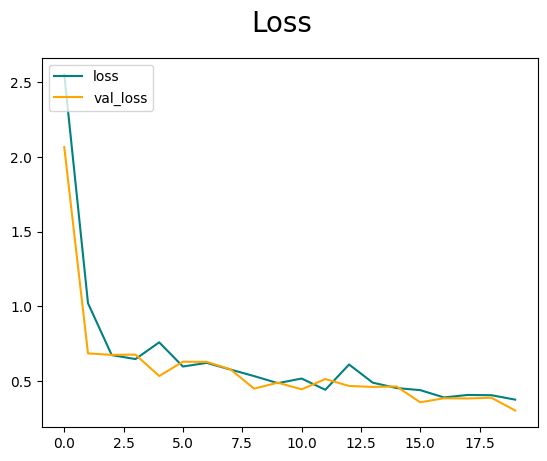

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

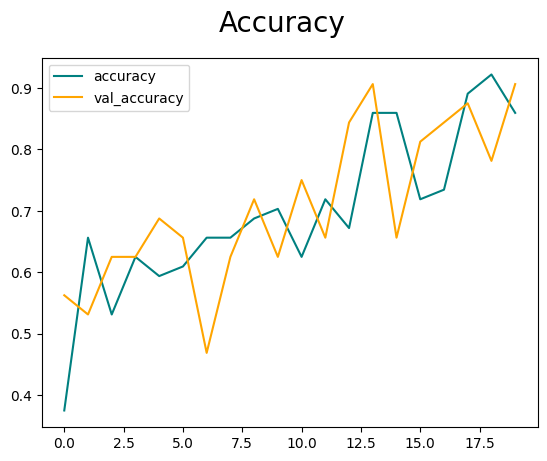

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluating Performance

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
prec = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    prec.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 243ms/step


In [32]:
print(f'Precision :{prec.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision :0.6428571343421936, Recall: 1.0, Accuracy:0.7222222089767456


# Test

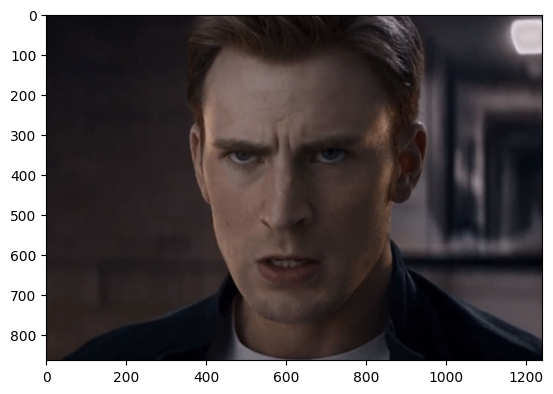

In [43]:
img_test = cv2.imread('angrychris.jpeg')
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.show()

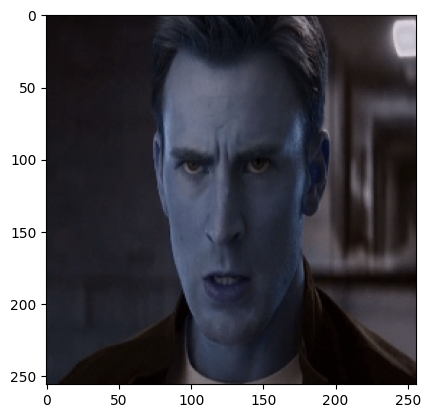

In [44]:
resize = tf.image.resize(img_test, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 31ms/step


array([[0.73474205]], dtype=float32)

In [47]:
if yhat > 0.5:
    print(f'predicted Class is Happy')
else:
    print(f'Predicted Class is Angry')

predicted Class is Happy


# Saving the Model

In [40]:
from tensorflow.keras.models import load_model

In [149]:
model.save(os.path.join('models', 'happyangrymodel.h5'))

# Reloading Model

In [41]:
new_model = load_model(os.path.join('models', 'happyangrymodel.h5'))

In [42]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 99ms/step


array([[0.95396316]], dtype=float32)